# Predicting Strokes with Logistic Regression

- Strokes are considered to be one of the most prominent causes of death globally, meaning predicting whether one will or will not occur for an individual could be life saving.
- The goal of this project is to predict whether or not a person will have a stroke based on a range of variables, outlined in the dataset. To achieve the prediction, logistic regression will be used to model the relationship between the independent variables and the dependent variable (whether or not a stroke will occur). Logistic regression uses the 'logistic funstion' to map any real number into a range between 0 and 1. The clamping of any number into this range is useful for binary classification and specifically for this project, as any individual assigned a '1' will be predicted to have a stroke and any individual assigned a '0' will be predicted to not have a stroke.
- The dataset provides data on approximately 5000 individuals.

- First, the necessary libraries are imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split

### Exploring the data

- The dataset is then explored to help optimise model performance
- For example, graphs can be used to understand the distribution of the different variables, discover if there are any null values and check if there are any categorical variables, which need to be handled

In [2]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
stroke_data.shape

(5110, 12)

- There are 5110 rows and 12 columns in the dataframe

In [4]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- The above outuput shows there are null values in the 'bmi' column, meaning these values need to either be imputed or the rows containing these values need to be removed from the dataset. As the rows containing these values only account for approximately 3% of the overall data, these rows can be removed, without risking a significant loss in data.

In [5]:
stroke_data.dropna(inplace=True)

In [6]:
stroke_data.shape

(4909, 12)

- After dropping the rows with null values, the number of rows in the dataframe has reduced to 4909

In [7]:
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


- Displaying the first 10 rows of the dataframe gives some key insight. Firstly, there are multiple variables which are categorical, so they will need to be handled through one hot encoding. There is also an 'id' column, which assigns every individual a unique number. However, this unique identifier does not provide any value regarding predicting whether or not someone will have a stroke, so this column needs to be dropped.

### Data Preprocessing

In [8]:
stroke_data = stroke_data.drop(columns=['id'], axis=1)

In [9]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


- The 'id' column has now been removed

In [10]:
stroke_data['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

- The value counts in the 'smoking_status' column indicates there are 1483 individuals where it is unknown whether they have smoked or not. Whilst this is not ideal, removing these rows completely will also remove approximately 30% of the total data, which is too significant to lose. It is also difficult to impute this data, as it is categorical and any imputation runs the risk of distorting the accuracy of the model. Finally, removing the 'smoking_status' variable completely, introduces the risk of inaccurately predicting whether or not an individual will have a stroke, as whether or not a person smokes is likely to have a significant impact on their health, and therefore, whether they will have a stroke.
- The only reasonable way of handling these values is to include the 'Unknown' category as part of the new dataframe, which has undergone one hot encoding.

- Splitting up the columns into their respective categorical and numerical types will make it easier to understand which variables need to be one hot encoded.

In [11]:
categorical = []
numerical = []
for col in stroke_data.columns:
    if stroke_data[col].dtypes == object:
        categorical.append(col)
    else:
        numerical.append(col)

In [12]:
print(f'Categorical Colmns: {categorical}\n')

print(f'Numerical Columns: {numerical}')


Categorical Colmns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

Numerical Columns: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


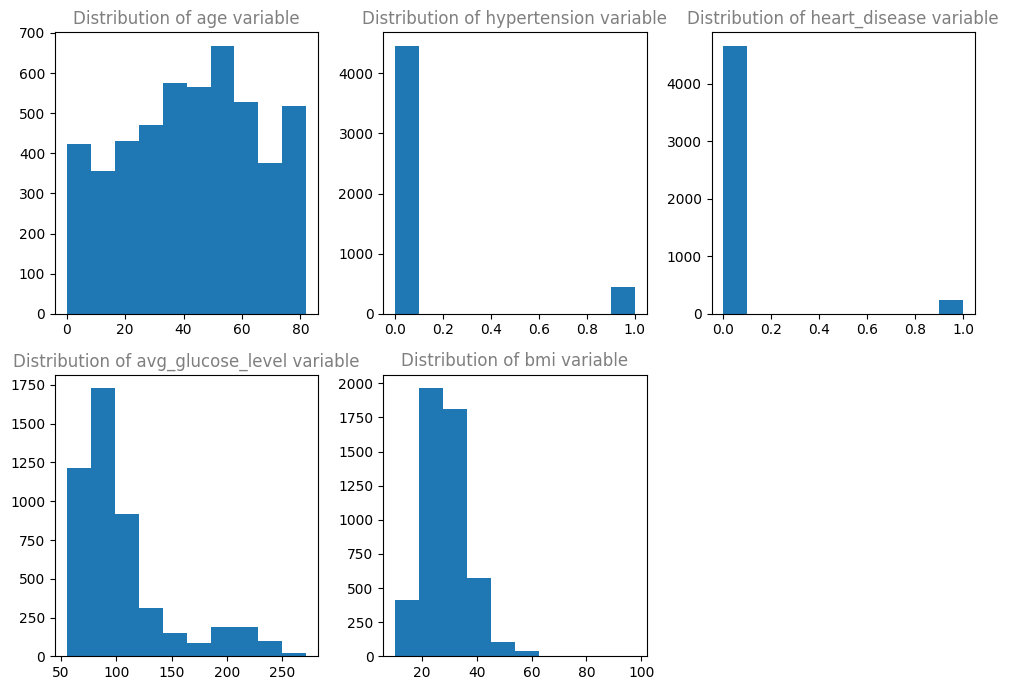

In [13]:
fig = plt.figure(figsize=(10,7))
for i, col in enumerate(numerical):
    if col != 'stroke':
        ax = fig.add_subplot(2, 3, i+1)
        ax.hist(stroke_data[col])
        ax.set_title(f'Distribution of {col} variable', alpha=0.5)
    
plt.tight_layout()
plt.show()

- The distributions of the numerical variables show the 'avg_glucose_level' and 'bmi' variables are right skewed. The logarithmic transformation can help reduce how skewed these variables are, by applying the logarithm function to each value in each variable. The transfomration works by compressing the values at the high end and expanding the values at the low end, bringing the values closer to the median.

In [14]:
transformer = FunctionTransformer(func=np.log1p)
transformed_cols = transformer.fit_transform(stroke_data[['bmi', 'avg_glucose_level']])

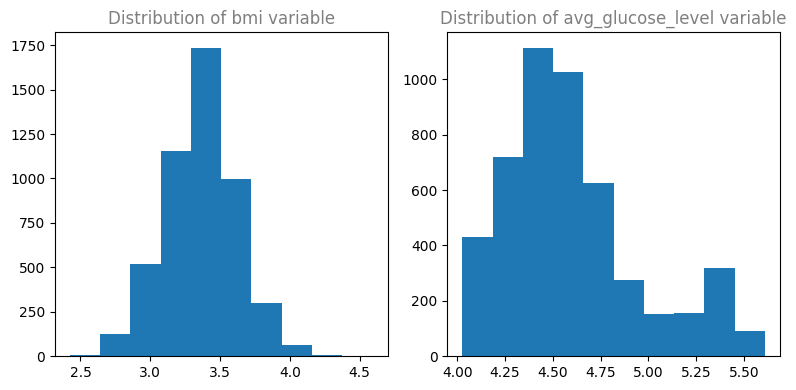

In [15]:
fig = plt.figure(figsize=(8,4))
for i, col in enumerate(transformed_cols):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(transformed_cols[col])
    ax.set_title(f'Distribution of {col} variable', alpha=0.5)
    
plt.tight_layout()
plt.show()

- The new distribution plots for the 'bmi' and 'avg_glucose_level' variables demonstrate a closer likeness to the normal distribution.

In [16]:
stroke_data['bmi'] = transformed_cols['bmi']
stroke_data['avg_glucose_level'] = transformed_cols['avg_glucose_level']

In [17]:
stroke_data = pd.get_dummies(stroke_data, columns= categorical)

In [18]:
stroke_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,5.436731,3.627004,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,4.672081,3.511545,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,5.148831,3.566712,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,5.165471,3.218876,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,5.232231,3.401197,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


- The categorical variables have now been one hot encoded and can now be used in the Logistic Regression model.

### Creating the Model

- The data are first split using the train_test_split function.

In [19]:
X = stroke_data.drop('stroke', axis=1)
y = stroke_data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Finally, the data are fit onto the Logistic Regression model, allowing predictions to be made as to whether or not an individual will have a stroke.

In [20]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
stroke_predictions = log_model.predict(X_test)
accuracy = accuracy_score(y_test, stroke_predictions)

In [21]:
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.9460285132382892


- An accuracy score of ~95% indicates the model is generally correct when predicting whether a person will have a stroke. To improve the accuracy of these predictions, other Machine Learning techniques, such as a K-Nearest Neighbour Classifier or Random Forest Classifier could be used in conjunction with the Logistic Regression Model, to analyse which model performs best, before selecting the most accurate one.
- Principal Component Analysis may also have helped in selecting the most important variables for the model.